<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 1 - Food Classification Model (Individual)</h2><h3>AY2022/23 Semester</h3></th>
    </tr>
</table>

In [44]:
# Import the Required Packages
import os
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
import matplotlib.pyplot as plt
from numpy import asarray
%matplotlib inline

AttributeError: type object 'Model' has no attribute '_TF_MODULE_IGNORED_PROPERTIES'

## Step 1: Data Loading

In [40]:
base_dir = 'C:\\Users\\xinle\\ASG1'
img_size = 100

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [41]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


## Step 2:  Develop the Image Classification Models

### Baseline Model (Cov2D) <a id="baseline_1"></a>

[Back to Model Evaluation](#baseline_1me)

In [45]:
baseline_1 = models.Sequential()
baseline_1.add(layers.Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(100, 100, 3)))
baseline_1.add(layers.MaxPooling2D(pool_size = (2, 2)))
baseline_1.add(layers.Conv2D(64, (3, 3), activation='relu'))
baseline_1.add(layers.MaxPooling2D(pool_size = (2, 2)))
baseline_1.add(layers.Conv2D(64, (3, 3), activation='relu'))
baseline_1.add(layers.MaxPooling2D(pool_size = (2, 2)))

baseline_1.add(layers.Flatten())
baseline_1.add(layers.Dense(20, activation='relu'))
baseline_1.add(layers.Dense(20, activation='relu'))
baseline_1.add(layers.Dense(10, activation='softmax'))

baseline_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_7 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 21, 21, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 64)      

In [46]:
baseline_1.compile(optimizer=optimizers.RMSprop(learning_rate=.0001),
              loss='categorical_crossentropy',
              metrics=['acc'])

baselineh1 = baseline_1.fit(train_generator, steps_per_epoch = 300, epochs=30, 
        validation_data=validation_generator, validation_steps=80)

Epoch 1/30
300/300 [==============================] - 218s 715ms/step - loss: 2.2862 - acc: 0.1352 - val_loss: 2.2676 - val_acc: 0.1775
Epoch 2/30
300/300 [==============================] - 166s 549ms/step - loss: 2.2339 - acc: 0.1880 - val_loss: 2.2179 - val_acc: 0.1935
Epoch 3/30
300/300 [==============================] - 156s 519ms/step - loss: 2.1459 - acc: 0.2432 - val_loss: 2.1455 - val_acc: 0.2190
Epoch 4/30
300/300 [==============================] - 191s 635ms/step - loss: 2.0730 - acc: 0.2649 - val_loss: 2.0827 - val_acc: 0.2465
Epoch 5/30
300/300 [==============================] - 182s 606ms/step - loss: 2.0156 - acc: 0.2803 - val_loss: 2.0310 - val_acc: 0.2690
Epoch 6/30
300/300 [==============================] - 189s 627ms/step - loss: 1.9739 - acc: 0.2980 - val_loss: 2.0336 - val_acc: 0.2615
Epoch 7/30
300/300 [==============================] - 156s 520ms/step - loss: 1.9333 - acc: 0.3089 - val_loss: 1.9760 - val_acc: 0.2915
Epoch 8/30
300/300 [============================

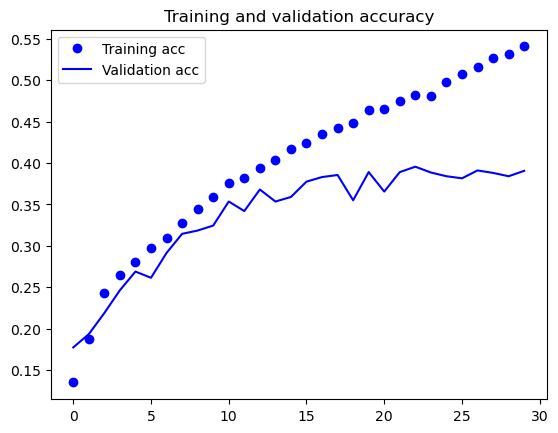

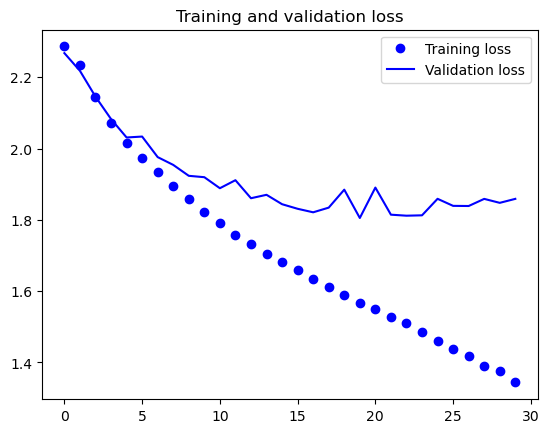

In [47]:
# Plot the Training and Validation Accuracy & Loss Scores

acc = baselineh1.history['acc']
val_acc = baselineh1.history['val_acc']
loss = baselineh1.history['loss']
val_loss = baselineh1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [62]:
baseline_1.save('baseline_1.h5')

### Model #1 <a id="model_1"></a>

[Back to Model Evaluation](#model_1me)

learning rate = 0.001

In [50]:
model_1 = models.Sequential()
model_1.add(layers.Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(100, 100, 3)))
model_1.add(layers.MaxPooling2D(pool_size = (2, 2)))
model_1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))

model_1.add(layers.Flatten())
model_1.add(layers.Dense(20, activation='relu'))
model_1.add(layers.Dense(20, activation='relu'))
model_1.add(layers.Dense(10, activation='softmax'))

model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 21, 21, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 10, 10, 64)      

In [53]:
model_1.compile(optimizer=optimizers.RMSprop(learning_rate=.001),
              loss='categorical_crossentropy',
              metrics=['acc'])

history1 = model_1.fit(train_generator, steps_per_epoch = 300, epochs=30, 
        validation_data=validation_generator, validation_steps= 80)

Epoch 1/30
300/300 [==============================] - 196s 645ms/step - loss: 2.2612 - acc: 0.1332 - val_loss: 2.1862 - val_acc: 0.2150
Epoch 2/30
300/300 [==============================] - 177s 590ms/step - loss: 2.1021 - acc: 0.2436 - val_loss: 2.1204 - val_acc: 0.2350
Epoch 3/30
300/300 [==============================] - 199s 664ms/step - loss: 1.9892 - acc: 0.2911 - val_loss: 1.9706 - val_acc: 0.2960
Epoch 4/30
300/300 [==============================] - 236s 783ms/step - loss: 1.8858 - acc: 0.3343 - val_loss: 1.9297 - val_acc: 0.3210
Epoch 5/30
300/300 [==============================] - 129s 429ms/step - loss: 1.7806 - acc: 0.3751 - val_loss: 1.9567 - val_acc: 0.3205
Epoch 6/30
300/300 [==============================] - 129s 429ms/step - loss: 1.6883 - acc: 0.4091 - val_loss: 1.8437 - val_acc: 0.3580
Epoch 7/30
300/300 [==============================] - 131s 436ms/step - loss: 1.5882 - acc: 0.4456 - val_loss: 1.9127 - val_acc: 0.3510
Epoch 8/30
300/300 [============================

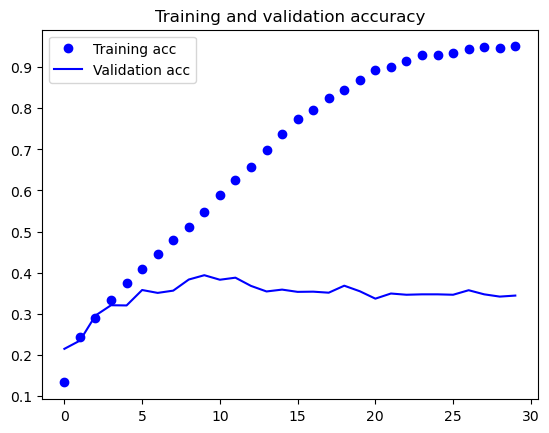

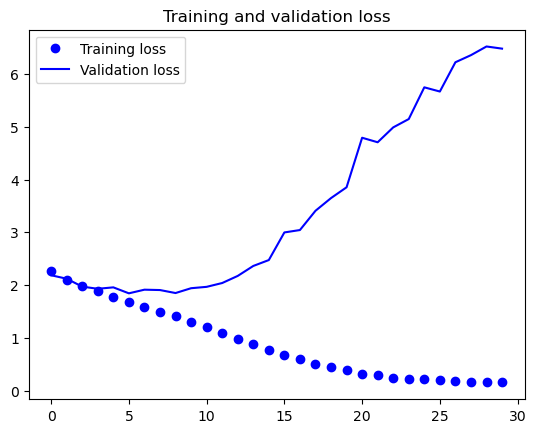

In [54]:
# Plot the Training and Validation Accuracy & Loss Scores

acc = history1.history['acc']
val_acc = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [56]:
model_1.save('model_1.h5')

### Model #2 <a id="model_2"></a>

[Back to Model Evaluation](#model_2me)

learning rate = 0.01

In [57]:
model_2 = models.Sequential()
model_2.add(layers.Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(100, 100, 3)))
model_2.add(layers.MaxPooling2D(pool_size = (2, 2)))
model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.Flatten())
model_2.add(layers.Dense(20, activation='relu'))
model_2.add(layers.Dense(20, activation='relu'))
model_2.add(layers.Dense(10, activation='softmax'))

model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 21, 21, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 10, 10, 64)      

In [58]:
model_2.compile(optimizer=optimizers.RMSprop(learning_rate=.01),
              loss='categorical_crossentropy',
              metrics=['acc'])

history2 = model_2.fit(train_generator, steps_per_epoch = 300, epochs=30, 
        validation_data=validation_generator, validation_steps=80)

Epoch 1/30
300/300 [==============================] - 217s 713ms/step - loss: 2.9014 - acc: 0.1037 - val_loss: 2.2861 - val_acc: 0.1275
Epoch 2/30
300/300 [==============================] - 229s 764ms/step - loss: 2.3443 - acc: 0.1072 - val_loss: 2.2999 - val_acc: 0.1125
Epoch 3/30
300/300 [==============================] - 169s 561ms/step - loss: 2.2237 - acc: 0.1620 - val_loss: 2.1901 - val_acc: 0.1975
Epoch 4/30
300/300 [==============================] - 138s 461ms/step - loss: 2.1575 - acc: 0.2033 - val_loss: 2.1486 - val_acc: 0.1990
Epoch 5/30
300/300 [==============================] - 143s 476ms/step - loss: 2.1272 - acc: 0.2215 - val_loss: 2.1223 - val_acc: 0.2140
Epoch 6/30
300/300 [==============================] - 122s 405ms/step - loss: 2.1038 - acc: 0.2383 - val_loss: 2.1088 - val_acc: 0.2260
Epoch 7/30
300/300 [==============================] - 126s 420ms/step - loss: 2.0755 - acc: 0.2465 - val_loss: 2.1980 - val_acc: 0.2010
Epoch 8/30
300/300 [============================

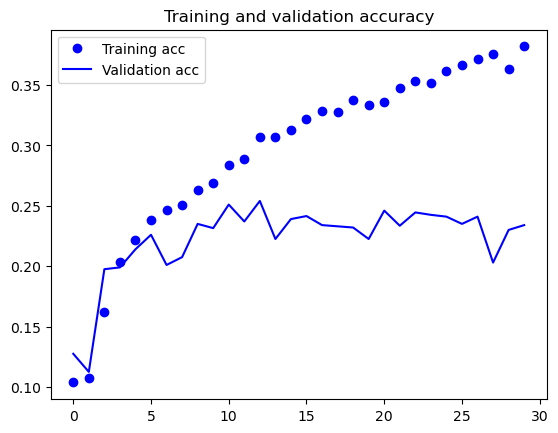

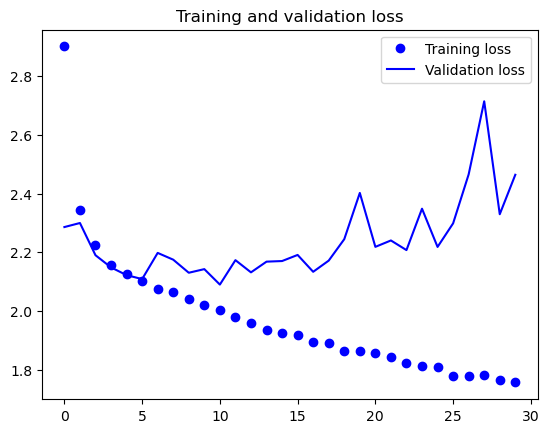

In [59]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [61]:
model_2.save('model_2.h5')

### Model #3 <a id="model_3"></a>

[Back to Model Evaluation](#model_3me)

dropout = 0.5

In [63]:
model_3 = models.Sequential()
model_3.add(layers.Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(100, 100, 3)))
model_3.add(layers.Dropout(0.5))
model_3.add(layers.MaxPooling2D(pool_size = (2, 2)))
model_3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_3.add(layers.Dropout(0.5))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_3.add(layers.Dropout(0.5))
model_3.add(layers.MaxPooling2D((2, 2)))

model_3.add(layers.Flatten())
model_3.add(layers.Dense(20, activation='relu'))
model_3.add(layers.Dense(20, activation='relu'))
model_3.add(layers.Dense(10, activation='softmax'))

model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 dropout (Dropout)           (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 47, 47, 64)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                 

In [64]:
model_3.compile(optimizer=optimizers.RMSprop(learning_rate=.0001),
              loss='categorical_crossentropy',
              metrics=['acc'])

history3 = model_3.fit(train_generator, steps_per_epoch = 300, epochs=30, 
        validation_data=validation_generator, validation_steps=80)

Epoch 1/30
300/300 [==============================] - 394s 1s/step - loss: 2.2998 - acc: 0.1161 - val_loss: 2.2949 - val_acc: 0.1570
Epoch 2/30
300/300 [==============================] - 272s 907ms/step - loss: 2.2600 - acc: 0.1615 - val_loss: 2.2840 - val_acc: 0.2035
Epoch 3/30
300/300 [==============================] - 269s 893ms/step - loss: 2.2203 - acc: 0.1877 - val_loss: 2.2731 - val_acc: 0.1715
Epoch 4/30
300/300 [==============================] - 243s 810ms/step - loss: 2.1743 - acc: 0.1967 - val_loss: 2.2568 - val_acc: 0.2070
Epoch 5/30
300/300 [==============================] - 224s 748ms/step - loss: 2.1269 - acc: 0.2195 - val_loss: 2.2467 - val_acc: 0.2320
Epoch 6/30
300/300 [==============================] - 200s 668ms/step - loss: 2.0753 - acc: 0.2412 - val_loss: 2.2215 - val_acc: 0.2455
Epoch 7/30
300/300 [==============================] - 176s 587ms/step - loss: 2.0257 - acc: 0.2719 - val_loss: 2.2059 - val_acc: 0.2535
Epoch 8/30
300/300 [==============================]

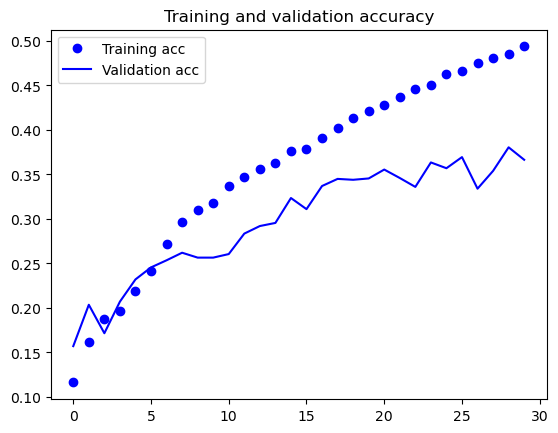

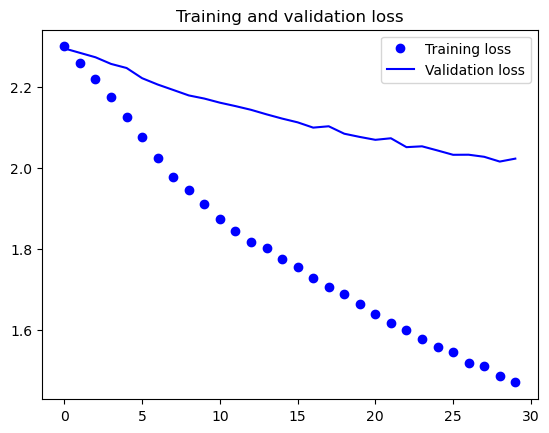

In [65]:
acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [67]:
model_3.save('model_3.h5')

### Model #4 <a id="model_4"></a>

[Back to Model Evaluation](#model_4me)

dropout = 0.2

In [68]:
model_4 = models.Sequential()
model_4.add(layers.Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(100, 100, 3)))
model_4.add(layers.Dropout(0.2))
model_4.add(layers.MaxPooling2D(pool_size = (2, 2)))
model_4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_4.add(layers.Dropout(0.2))
model_4.add(layers.MaxPooling2D((2, 2)))
model_4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_4.add(layers.Dropout(0.2))
model_4.add(layers.MaxPooling2D((2, 2)))

model_4.add(layers.Flatten())
model_4.add(layers.Dense(20, activation='relu'))
model_4.add(layers.Dense(20, activation='relu'))
model_4.add(layers.Dense(10, activation='softmax'))

model_4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 dropout_3 (Dropout)         (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 dropout_4 (Dropout)         (None, 47, 47, 64)        0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                 

In [69]:
model_4.compile(optimizer=optimizers.RMSprop(learning_rate=.0001),
              loss='categorical_crossentropy',
              metrics=['acc'])

history4 = model_4.fit(train_generator, steps_per_epoch = 300, epochs=30, 
        validation_data=validation_generator, validation_steps=80)

Epoch 1/30
300/300 [==============================] - 148s 491ms/step - loss: 2.2878 - acc: 0.1209 - val_loss: 2.2732 - val_acc: 0.1335
Epoch 2/30
300/300 [==============================] - 148s 493ms/step - loss: 2.2241 - acc: 0.1593 - val_loss: 2.2174 - val_acc: 0.1860
Epoch 3/30
300/300 [==============================] - 168s 559ms/step - loss: 2.1318 - acc: 0.2312 - val_loss: 2.1780 - val_acc: 0.2225
Epoch 4/30
300/300 [==============================] - 154s 512ms/step - loss: 2.0554 - acc: 0.2705 - val_loss: 2.1128 - val_acc: 0.2875
Epoch 5/30
300/300 [==============================] - 149s 497ms/step - loss: 1.9826 - acc: 0.3013 - val_loss: 2.0683 - val_acc: 0.3050
Epoch 6/30
300/300 [==============================] - 146s 488ms/step - loss: 1.9264 - acc: 0.3256 - val_loss: 2.0419 - val_acc: 0.3015
Epoch 7/30
300/300 [==============================] - 149s 496ms/step - loss: 1.8926 - acc: 0.3371 - val_loss: 2.0432 - val_acc: 0.2900
Epoch 8/30
300/300 [============================

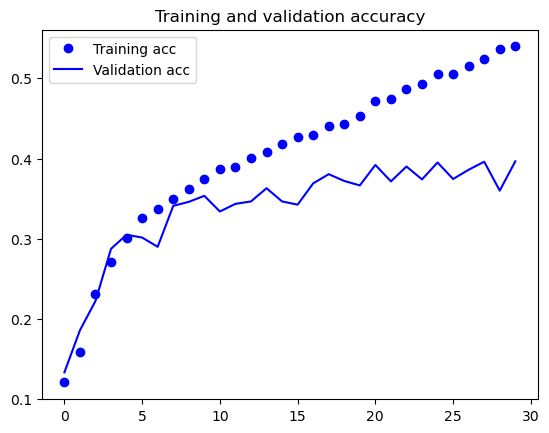

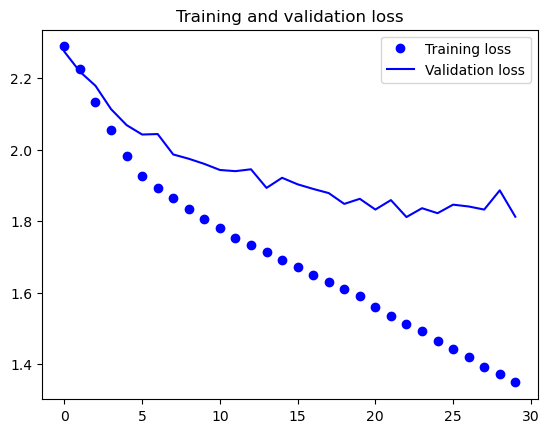

In [70]:
acc = history4.history['acc']
val_acc = history4.history['val_acc']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [72]:
model_4.save('model_4.h5')

### Model #5 <a id="model_5"></a>

[Back to Model Evaluation](#model_5me)

L2 regularizers = 0.0001

In [74]:
model_5 = models.Sequential()
model_5.add(layers.Conv2D(32, kernel_size = (3, 3), kernel_regularizer=regularizers.l2(0.0001),
                          activation='relu', input_shape=(100, 100, 3)))
model_5.add(layers.MaxPooling2D(pool_size = (2, 2)))
model_5.add(layers.Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model_5.add(layers.MaxPooling2D((2, 2)))
model_5.add(layers.Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model_5.add(layers.MaxPooling2D((2, 2)))

model_5.add(layers.Flatten())
model_5.add(layers.Dense(20, activation='relu'))
model_5.add(layers.Dense(20, activation='relu'))
model_5.add(layers.Dense(10, activation='softmax'))

model_5.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 21, 21, 64)        36928     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 10, 10, 64)      

In [75]:
model_5.compile(optimizer=optimizers.RMSprop(learning_rate=.0001),
              loss='categorical_crossentropy',
              metrics=['acc'])

history5 = model_5.fit(train_generator, steps_per_epoch = 300, epochs=30, 
        validation_data=validation_generator, validation_steps=80)

Epoch 1/30
300/300 [==============================] - 103s 339ms/step - loss: 2.2810 - acc: 0.1343 - val_loss: 2.2320 - val_acc: 0.1590
Epoch 2/30
300/300 [==============================] - 100s 334ms/step - loss: 2.1714 - acc: 0.2147 - val_loss: 2.1430 - val_acc: 0.2380
Epoch 3/30
300/300 [==============================] - 114s 380ms/step - loss: 2.0897 - acc: 0.2617 - val_loss: 2.1166 - val_acc: 0.2635
Epoch 4/30
300/300 [==============================] - 96s 318ms/step - loss: 2.0237 - acc: 0.2907 - val_loss: 2.0479 - val_acc: 0.2660
Epoch 5/30
300/300 [==============================] - 96s 320ms/step - loss: 1.9735 - acc: 0.3051 - val_loss: 2.0188 - val_acc: 0.3020
Epoch 6/30
300/300 [==============================] - 105s 348ms/step - loss: 1.9305 - acc: 0.3185 - val_loss: 2.0191 - val_acc: 0.3135
Epoch 7/30
300/300 [==============================] - 96s 319ms/step - loss: 1.8898 - acc: 0.3353 - val_loss: 1.9699 - val_acc: 0.3195
Epoch 8/30
300/300 [==============================]

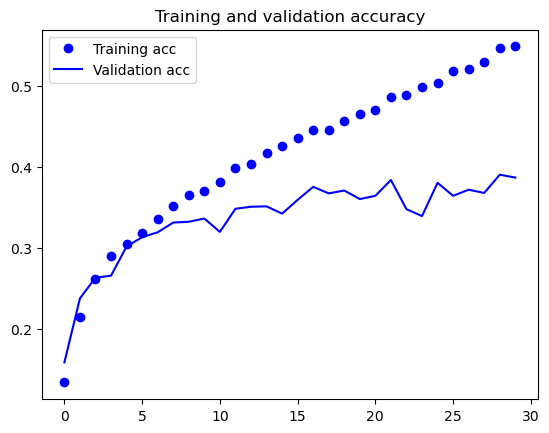

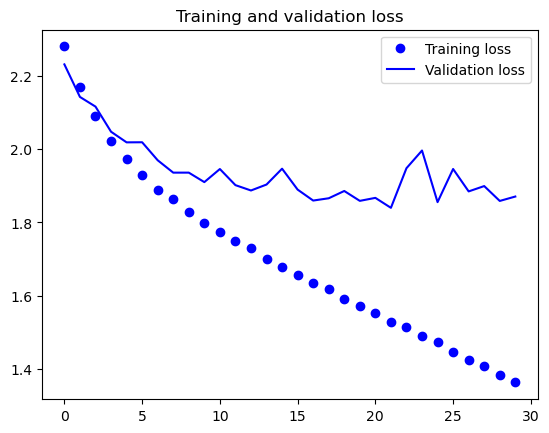

In [76]:
acc = history5.history['acc']
val_acc = history5.history['val_acc']
loss = history5.history['loss']
val_loss = history5.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [81]:
model_5.save('model_5.h5')

### Model #6 <a id="model_6"></a>

[Back to Model Evaluation](#model_6me)

L2 regularizers = 0.001

In [82]:
model_6 = models.Sequential()
model_6.add(layers.Conv2D(32, kernel_size = (3, 3), kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(100, 100, 3)))
model_6.add(layers.MaxPooling2D(pool_size = (2, 2)))
model_6.add(layers.Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model_6.add(layers.MaxPooling2D((2, 2)))
model_6.add(layers.Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model_6.add(layers.MaxPooling2D((2, 2)))

model_6.add(layers.Flatten())
model_6.add(layers.Dense(20, activation='relu'))
model_6.add(layers.Dense(20, activation='relu'))
model_6.add(layers.Dense(10, activation='softmax'))

model_6.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 21, 21, 64)        36928     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 10, 10, 64)      

In [83]:
model_6.compile(optimizer=optimizers.RMSprop(learning_rate=.0001),
              loss='categorical_crossentropy',
              metrics=['acc'])

history6 = model_6.fit(train_generator, steps_per_epoch = 300, epochs=30, 
        validation_data=validation_generator, validation_steps=80)

Epoch 1/30
300/300 [==============================] - 101s 334ms/step - loss: 2.3491 - acc: 0.1597 - val_loss: 2.3021 - val_acc: 0.1795
Epoch 2/30
300/300 [==============================] - 99s 329ms/step - loss: 2.2333 - acc: 0.2155 - val_loss: 2.2268 - val_acc: 0.2045
Epoch 3/30
300/300 [==============================] - 103s 342ms/step - loss: 2.1677 - acc: 0.2425 - val_loss: 2.2087 - val_acc: 0.2295
Epoch 4/30
300/300 [==============================] - 114s 381ms/step - loss: 2.1063 - acc: 0.2609 - val_loss: 2.0938 - val_acc: 0.2810
Epoch 5/30
300/300 [==============================] - 101s 335ms/step - loss: 2.0513 - acc: 0.2839 - val_loss: 2.1860 - val_acc: 0.2335
Epoch 6/30
300/300 [==============================] - 96s 321ms/step - loss: 2.0114 - acc: 0.3115 - val_loss: 2.0221 - val_acc: 0.3135
Epoch 7/30
300/300 [==============================] - 93s 310ms/step - loss: 1.9792 - acc: 0.3319 - val_loss: 2.0060 - val_acc: 0.3160
Epoch 8/30
300/300 [==============================]

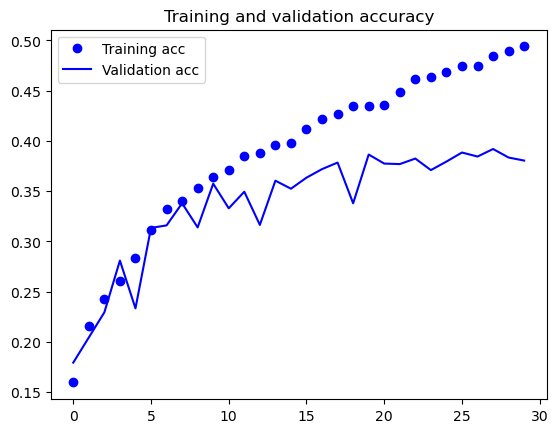

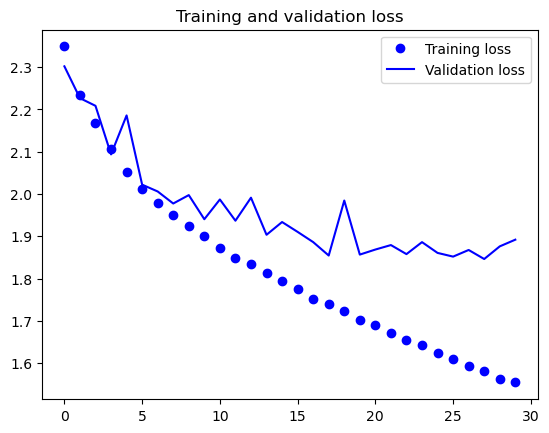

In [84]:
acc = history6.history['acc']
val_acc = history6.history['val_acc']
loss = history6.history['loss']
val_loss = history6.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [86]:
model_6.save('model_6.h5')

### Model #7 <a id="model_7"></a>

[Back to Model Evaluation](#model_7me)

L2 Regularizers = 0.01

In [87]:
model_7 = models.Sequential()
model_7.add(layers.Conv2D(32, kernel_size = (3, 3), kernel_regularizer=regularizers.l2(0.01),
                          activation='relu', input_shape=(100, 100, 3)))
model_7.add(layers.MaxPooling2D(pool_size = (2, 2)))
model_7.add(layers.Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model_7.add(layers.MaxPooling2D((2, 2)))
model_7.add(layers.Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model_7.add(layers.MaxPooling2D((2, 2)))

model_7.add(layers.Flatten())
model_7.add(layers.Dense(20, activation='relu'))
model_7.add(layers.Dense(20, activation='relu'))
model_7.add(layers.Dense(10, activation='softmax'))

model_7.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 21, 21, 64)        36928     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 10, 10, 64)      

In [88]:
model_7.compile(optimizer=optimizers.RMSprop(learning_rate=.0001),
              loss='categorical_crossentropy',
              metrics=['acc'])

history7 = model_7.fit(train_generator, steps_per_epoch = 300, epochs=30, 
        validation_data=validation_generator, validation_steps=80)

Epoch 1/30
300/300 [==============================] - 135s 447ms/step - loss: 2.9809 - acc: 0.1223 - val_loss: 2.6734 - val_acc: 0.1730
Epoch 2/30
300/300 [==============================] - 121s 403ms/step - loss: 2.5301 - acc: 0.1796 - val_loss: 2.4297 - val_acc: 0.2090
Epoch 3/30
300/300 [==============================] - 126s 421ms/step - loss: 2.3662 - acc: 0.2239 - val_loss: 2.3342 - val_acc: 0.2265
Epoch 4/30
300/300 [==============================] - 145s 482ms/step - loss: 2.2580 - acc: 0.2675 - val_loss: 2.2514 - val_acc: 0.2725
Epoch 5/30
300/300 [==============================] - 138s 460ms/step - loss: 2.1947 - acc: 0.2815 - val_loss: 2.2010 - val_acc: 0.2940
Epoch 6/30
300/300 [==============================] - 170s 566ms/step - loss: 2.1484 - acc: 0.2887 - val_loss: 2.1904 - val_acc: 0.2915
Epoch 7/30
300/300 [==============================] - 180s 601ms/step - loss: 2.1143 - acc: 0.3020 - val_loss: 2.1275 - val_acc: 0.2835
Epoch 8/30
300/300 [============================

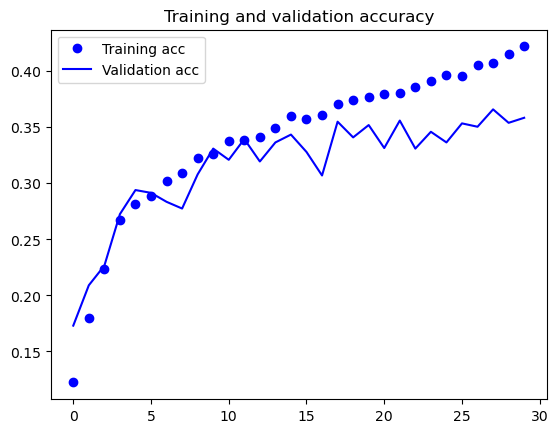

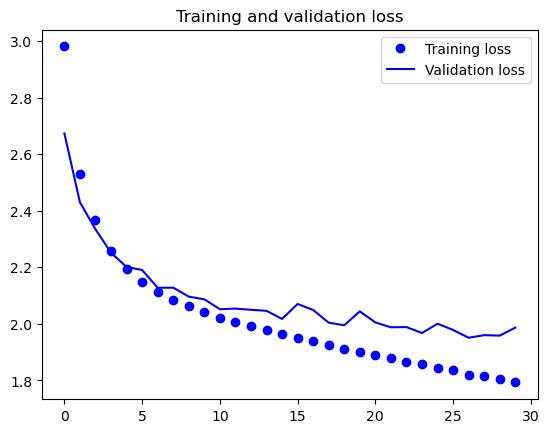

In [89]:
acc = history7.history['acc']
val_acc = history7.history['val_acc']
loss = history7.history['loss']
val_loss = history7.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [91]:
model_7.save('model_7.h5')

### Model #8 <a id="model_8"></a>

[Back to Model Evaluation](#model_8me)

L1 Regularizers = 0.001

In [92]:
model_8= models.Sequential()
model_8.add(layers.Conv2D(32, kernel_size = (3, 3), kernel_regularizer=regularizers.l1(0.001),
                          activation='relu', input_shape=(100, 100, 3)))
model_8.add(layers.MaxPooling2D(pool_size = (2, 2)))
model_8.add(layers.Conv2D(64, (3, 3), kernel_regularizer=regularizers.l1(0.001), activation='relu'))
model_8.add(layers.MaxPooling2D((2, 2)))
model_8.add(layers.Conv2D(64, (3, 3), kernel_regularizer=regularizers.l1(0.001), activation='relu'))
model_8.add(layers.MaxPooling2D((2, 2)))

model_8.add(layers.Flatten())
model_8.add(layers.Dense(20, activation='relu'))
model_8.add(layers.Dense(20, activation='relu'))
model_8.add(layers.Dense(10, activation='softmax'))

model_8.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 21, 21, 64)        36928     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 10, 10, 64)     

In [93]:
model_8.compile(optimizer=optimizers.RMSprop(learning_rate=.0001),
              loss='categorical_crossentropy',
              metrics=['acc'])

history8 = model_8.fit(train_generator, steps_per_epoch = 300, epochs=30, 
        validation_data=validation_generator, validation_steps=80)

Epoch 1/30
300/300 [==============================] - 192s 633ms/step - loss: 3.8440 - acc: 0.1557 - val_loss: 3.3760 - val_acc: 0.1665
Epoch 2/30
300/300 [==============================] - 195s 649ms/step - loss: 3.0598 - acc: 0.1973 - val_loss: 2.8247 - val_acc: 0.2175
Epoch 3/30
300/300 [==============================] - 182s 607ms/step - loss: 2.7021 - acc: 0.2159 - val_loss: 2.6524 - val_acc: 0.2070
Epoch 4/30
300/300 [==============================] - 188s 626ms/step - loss: 2.5650 - acc: 0.2333 - val_loss: 2.5246 - val_acc: 0.2405
Epoch 5/30
300/300 [==============================] - 176s 586ms/step - loss: 2.4826 - acc: 0.2421 - val_loss: 2.4708 - val_acc: 0.2415
Epoch 6/30
300/300 [==============================] - 185s 616ms/step - loss: 2.4179 - acc: 0.2605 - val_loss: 2.4127 - val_acc: 0.2635
Epoch 7/30
300/300 [==============================] - 194s 645ms/step - loss: 2.3738 - acc: 0.2663 - val_loss: 2.3648 - val_acc: 0.2745
Epoch 8/30
300/300 [============================

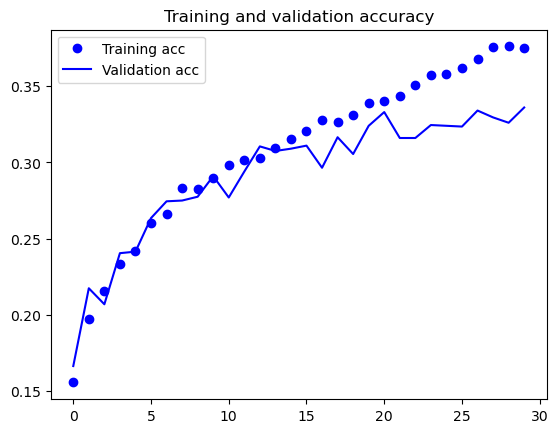

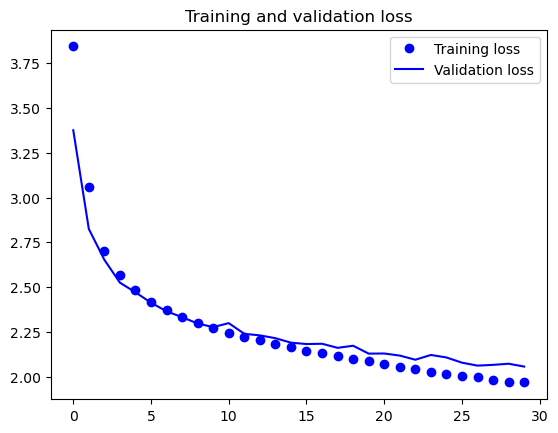

In [94]:
acc = history8.history['acc']
val_acc = history8.history['val_acc']
loss = history8.history['loss']
val_loss = history8.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [109]:
model_8.save('model_8.h5')

### Model #9 <a id="model_9"></a>

[Back to Model Evaluation](#model_9me)

L1 Regularizers = 0.01

In [96]:
model_9 = models.Sequential()
model_9.add(layers.Conv2D(32, kernel_size = (3, 3), kernel_regularizer=regularizers.l1(0.01),
                          activation='relu', input_shape=(100, 100, 3)))
model_9.add(layers.MaxPooling2D(pool_size = (2, 2)))
model_9.add(layers.Conv2D(64, (3, 3), kernel_regularizer=regularizers.l1(0.01), activation='relu'))
model_9.add(layers.MaxPooling2D((2, 2)))
model_9.add(layers.Conv2D(64, (3, 3), kernel_regularizer=regularizers.l1(0.01), activation='relu'))
model_9.add(layers.MaxPooling2D((2, 2)))

model_9.add(layers.Flatten())
model_9.add(layers.Dense(20, activation='relu'))
model_9.add(layers.Dense(20, activation='relu'))
model_9.add(layers.Dense(10, activation='softmax'))

model_9.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 21, 21, 64)        36928     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 10, 10, 64)     

In [97]:
model_9.compile(optimizer=optimizers.RMSprop(learning_rate=.0001),
              loss='categorical_crossentropy',
              metrics=['acc'])

history9 = model_9.fit(train_generator, steps_per_epoch = 300, epochs=30, 
        validation_data=validation_generator, validation_steps=80)

Epoch 1/30
300/300 [==============================] - 187s 615ms/step - loss: 16.3516 - acc: 0.1321 - val_loss: 10.3520 - val_acc: 0.1415
Epoch 2/30
300/300 [==============================] - 179s 596ms/step - loss: 6.5624 - acc: 0.1607 - val_loss: 3.7742 - val_acc: 0.1540
Epoch 3/30
300/300 [==============================] - 182s 605ms/step - loss: 2.8795 - acc: 0.1541 - val_loss: 2.5417 - val_acc: 0.1370
Epoch 4/30
300/300 [==============================] - 186s 621ms/step - loss: 2.4614 - acc: 0.1592 - val_loss: 2.4145 - val_acc: 0.1540
Epoch 5/30
300/300 [==============================] - 182s 607ms/step - loss: 2.3727 - acc: 0.1608 - val_loss: 2.3633 - val_acc: 0.1540
Epoch 6/30
300/300 [==============================] - 182s 607ms/step - loss: 2.3391 - acc: 0.1629 - val_loss: 2.3536 - val_acc: 0.1470
Epoch 7/30
300/300 [==============================] - 143s 474ms/step - loss: 2.3209 - acc: 0.1616 - val_loss: 2.3308 - val_acc: 0.1560
Epoch 8/30
300/300 [==========================

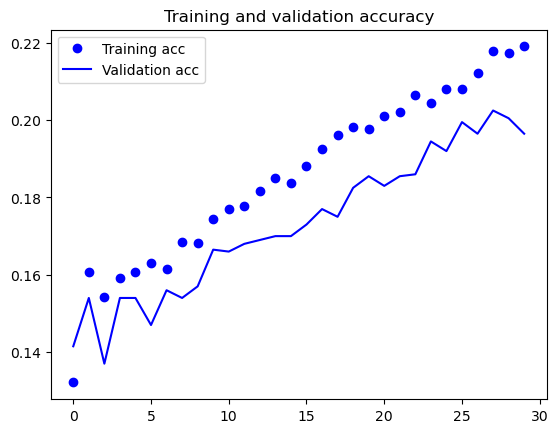

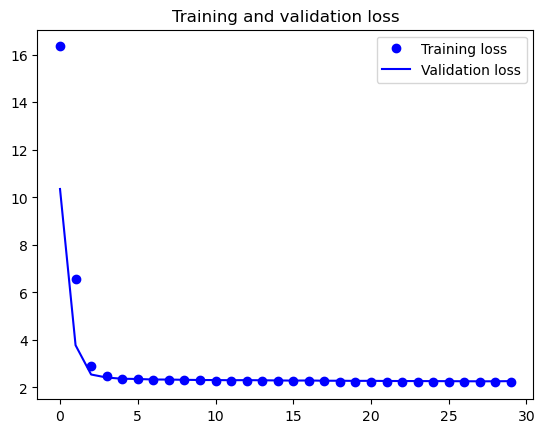

In [98]:
acc = history9.history['acc']
val_acc = history9.history['val_acc']
loss = history9.history['loss']
val_loss = history9.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [110]:
model_9.save('model_9.h5')

### Model #10 <a id="model_10"></a>

[Back to Model Evaluation](#model_10me)

Adam optimizer

In [112]:
model_10 = models.Sequential()
model_10.add(layers.Conv2D(32, kernel_size = (3, 3), kernel_regularizer=regularizers.l2(0.0001),
                          activation='relu', input_shape=(100, 100, 3)))
model_10.add(layers.MaxPooling2D(pool_size = (2, 2)))
model_10.add(layers.Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model_10.add(layers.MaxPooling2D((2, 2)))
model_10.add(layers.Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model_10.add(layers.MaxPooling2D((2, 2)))

model_10.add(layers.Flatten())
model_10.add(layers.Dense(20, activation='relu'))
model_10.add(layers.Dense(20, activation='relu'))
model_10.add(layers.Dense(10, activation='softmax'))

model_10.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 21, 21, 64)        36928     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 10, 10, 64)     

In [113]:
model_10.compile(optimizer=optimizers.Adam(learning_rate=.0001),
              loss='categorical_crossentropy',
              metrics=['acc'])

history10 = model_10.fit(train_generator, steps_per_epoch = 300, epochs=30, 
        validation_data=validation_generator, validation_steps=80)

Epoch 1/30
300/300 [==============================] - 128s 423ms/step - loss: 2.2630 - acc: 0.1597 - val_loss: 2.1963 - val_acc: 0.2060
Epoch 2/30
300/300 [==============================] - 117s 388ms/step - loss: 2.1283 - acc: 0.2308 - val_loss: 2.1121 - val_acc: 0.2535
Epoch 3/30
300/300 [==============================] - 120s 398ms/step - loss: 2.0513 - acc: 0.2752 - val_loss: 2.0632 - val_acc: 0.2665
Epoch 4/30
300/300 [==============================] - 125s 418ms/step - loss: 1.9627 - acc: 0.3088 - val_loss: 2.0053 - val_acc: 0.3035
Epoch 5/30
300/300 [==============================] - 133s 444ms/step - loss: 1.8985 - acc: 0.3429 - val_loss: 1.9426 - val_acc: 0.3480
Epoch 6/30
300/300 [==============================] - 141s 471ms/step - loss: 1.8543 - acc: 0.3612 - val_loss: 1.9232 - val_acc: 0.3290
Epoch 7/30
300/300 [==============================] - 130s 433ms/step - loss: 1.8075 - acc: 0.3768 - val_loss: 1.8995 - val_acc: 0.3375
Epoch 8/30
300/300 [============================

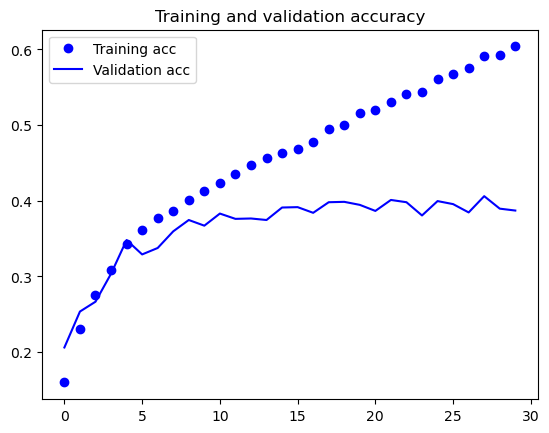

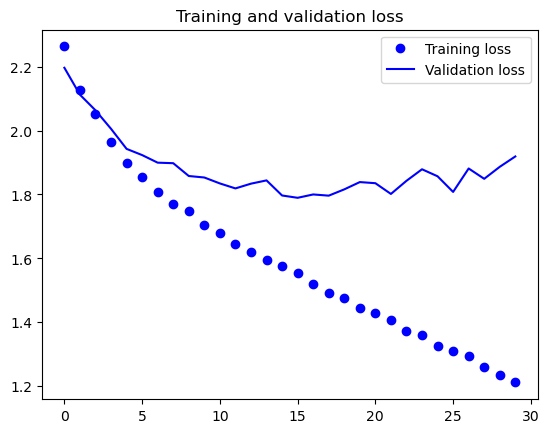

In [114]:
acc = history10.history['acc']
val_acc = history10.history['val_acc']
loss = history10.history['loss']
val_loss = history10.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [115]:
test_generator =test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size,img_size),
        batch_size = 25,
        class_mode = 'categorical')
test_loss, test_acc = model_10.evaluate(test_generator, steps=20)
print('test acc:', test_acc) 

Found 500 images belonging to 10 classes.
20/20 [==============================] - 3s 159ms/step - loss: 2.0646 - acc: 0.3660
test acc: 0.3659999966621399


In [116]:
model_10.save('model_10.h5')

### Model #11 <a id="model_11"></a>

[Back to Model Evaluation](#model_9me)

SGD optimizer

In [117]:
model_11 = models.Sequential()
model_11.add(layers.Conv2D(32, kernel_size = (3, 3), kernel_regularizer=regularizers.l2(0.0001),
                          activation='relu', input_shape=(100, 100, 3)))
model_11.add(layers.MaxPooling2D(pool_size = (2, 2)))
model_11.add(layers.Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model_11.add(layers.MaxPooling2D((2, 2)))
model_11.add(layers.Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model_11.add(layers.MaxPooling2D((2, 2)))

model_11.add(layers.Flatten())
model_11.add(layers.Dense(20, activation='relu'))
model_11.add(layers.Dense(20, activation='relu'))
model_11.add(layers.Dense(10, activation='softmax'))

model_11.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 21, 21, 64)        36928     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 10, 10, 64)     

In [118]:
model_11.compile(optimizer=optimizers.SGD(learning_rate=.0001),
              loss='categorical_crossentropy',
              metrics=['acc'])

history11 = model_11.fit(train_generator, steps_per_epoch = 300, epochs=30, 
        validation_data=validation_generator, validation_steps=80)

Epoch 1/30
300/300 [==============================] - 111s 368ms/step - loss: 2.3138 - acc: 0.1192 - val_loss: 2.3135 - val_acc: 0.1185
Epoch 2/30
300/300 [==============================] - 118s 393ms/step - loss: 2.3133 - acc: 0.1219 - val_loss: 2.3131 - val_acc: 0.1170
Epoch 3/30
300/300 [==============================] - 106s 352ms/step - loss: 2.3130 - acc: 0.1221 - val_loss: 2.3129 - val_acc: 0.1160
Epoch 4/30
300/300 [==============================] - 104s 347ms/step - loss: 2.3127 - acc: 0.1219 - val_loss: 2.3127 - val_acc: 0.1170
Epoch 5/30
300/300 [==============================] - 110s 365ms/step - loss: 2.3126 - acc: 0.1231 - val_loss: 2.3125 - val_acc: 0.1175
Epoch 6/30
300/300 [==============================] - 120s 399ms/step - loss: 2.3124 - acc: 0.1232 - val_loss: 2.3124 - val_acc: 0.1225
Epoch 7/30
300/300 [==============================] - 143s 477ms/step - loss: 2.3122 - acc: 0.1229 - val_loss: 2.3123 - val_acc: 0.1275
Epoch 8/30
300/300 [============================

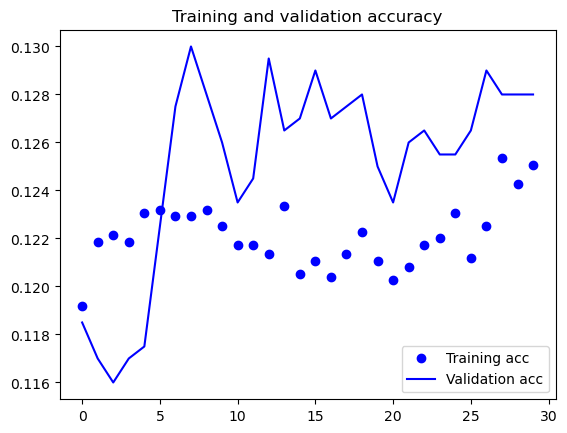

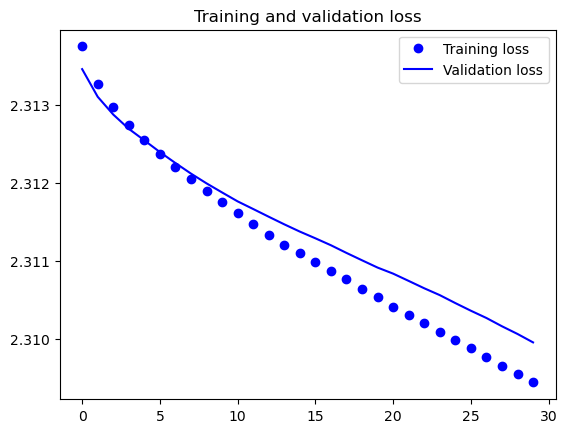

In [119]:
acc = history11.history['acc']
val_acc = history11.history['val_acc']
loss = history11.history['loss']
val_loss = history11.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [121]:
model_11.save('model_11.h5')

### Model #12 <a id="model_12"></a>

[Back to Model Evaluation](#model_12me)

network size 64,64,10

In [124]:
model_12 = models.Sequential()
model_12.add(layers.Conv2D(32, kernel_size = (3, 3), kernel_regularizer=regularizers.l2(0.0001),
                          activation='relu', input_shape=(100, 100, 3)))
model_12.add(layers.MaxPooling2D(pool_size = (2, 2)))
model_12.add(layers.Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model_12.add(layers.MaxPooling2D((2, 2)))
model_12.add(layers.Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model_12.add(layers.MaxPooling2D((2, 2)))

model_12.add(layers.Flatten())
model_12.add(layers.Dense(64, activation='relu'))
model_12.add(layers.Dense(64, activation='relu'))
model_12.add(layers.Dense(10, activation='softmax'))

model_12.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 21, 21, 64)        36928     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 10, 10, 64)     

In [125]:
model_12.compile(optimizer=optimizers.RMSprop(learning_rate=.0001),
              loss='categorical_crossentropy',
              metrics=['acc'])

history12 = model_12.fit(train_generator, steps_per_epoch = 300, epochs=30, 
        validation_data=validation_generator, validation_steps=80)

Epoch 1/30
300/300 [==============================] - 123s 406ms/step - loss: 2.2347 - acc: 0.1773 - val_loss: 2.1419 - val_acc: 0.2165
Epoch 2/30
300/300 [==============================] - 125s 417ms/step - loss: 2.0831 - acc: 0.2591 - val_loss: 2.0444 - val_acc: 0.2785
Epoch 3/30
300/300 [==============================] - 124s 413ms/step - loss: 1.9899 - acc: 0.3075 - val_loss: 2.0279 - val_acc: 0.3050
Epoch 4/30
300/300 [==============================] - 108s 361ms/step - loss: 1.9195 - acc: 0.3303 - val_loss: 1.9270 - val_acc: 0.3275
Epoch 5/30
300/300 [==============================] - 108s 361ms/step - loss: 1.8694 - acc: 0.3521 - val_loss: 1.9017 - val_acc: 0.3525
Epoch 6/30
300/300 [==============================] - 125s 415ms/step - loss: 1.8294 - acc: 0.3705 - val_loss: 1.8971 - val_acc: 0.3495
Epoch 7/30
300/300 [==============================] - 126s 420ms/step - loss: 1.7868 - acc: 0.3832 - val_loss: 1.8556 - val_acc: 0.3525
Epoch 8/30
300/300 [============================

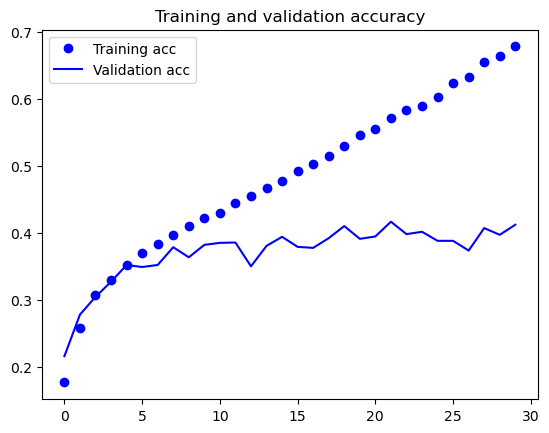

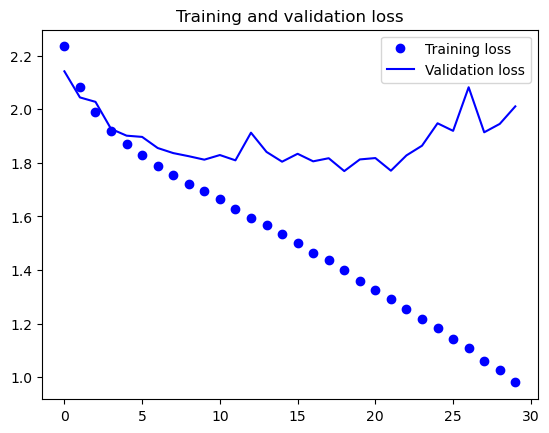

In [126]:
acc = history12.history['acc']
val_acc = history12.history['val_acc']
loss = history12.history['loss']
val_loss = history12.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [128]:
model_12.save('model_12.h5')

### Model #13 <a id="model_13"></a>

[Back to Model Evaluation](#model_13me)

epochs= 60

In [133]:
model_13 = models.Sequential()
model_13.add(layers.Conv2D(32, kernel_size = (3, 3), kernel_regularizer=regularizers.l2(0.0001),
                          activation='relu', input_shape=(100, 100, 3)))
model_13.add(layers.MaxPooling2D(pool_size = (2, 2)))
model_13.add(layers.Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model_13.add(layers.MaxPooling2D((2, 2)))
model_13.add(layers.Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model_13.add(layers.MaxPooling2D((2, 2)))

model_13.add(layers.Flatten())
model_13.add(layers.Dense(20, activation='relu'))
model_13.add(layers.Dense(20, activation='relu'))
model_13.add(layers.Dense(10, activation='softmax'))

model_13.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 21, 21, 64)        36928     
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 10, 10, 64)     

In [134]:
model_13.compile(optimizer=optimizers.RMSprop(learning_rate=.0001),
              loss='categorical_crossentropy',
              metrics=['acc'])

history13 = model_13.fit(train_generator, steps_per_epoch = 300, epochs=60, 
        validation_data=validation_generator, validation_steps=80)

Epoch 1/60
300/300 [==============================] - 111s 367ms/step - loss: 2.3057 - acc: 0.1181 - val_loss: 2.2903 - val_acc: 0.1250
Epoch 2/60
300/300 [==============================] - 109s 364ms/step - loss: 2.2788 - acc: 0.1636 - val_loss: 2.2557 - val_acc: 0.1795
Epoch 3/60
300/300 [==============================] - 108s 359ms/step - loss: 2.2463 - acc: 0.1796 - val_loss: 2.2285 - val_acc: 0.1745
Epoch 4/60
300/300 [==============================] - 102s 341ms/step - loss: 2.2099 - acc: 0.1856 - val_loss: 2.1886 - val_acc: 0.2005
Epoch 5/60
300/300 [==============================] - 108s 359ms/step - loss: 2.1651 - acc: 0.2084 - val_loss: 2.1766 - val_acc: 0.1825
Epoch 6/60
300/300 [==============================] - 103s 341ms/step - loss: 2.1159 - acc: 0.2213 - val_loss: 2.1130 - val_acc: 0.2205
Epoch 7/60
300/300 [==============================] - 102s 340ms/step - loss: 2.0677 - acc: 0.2480 - val_loss: 2.0770 - val_acc: 0.2370
Epoch 8/60
300/300 [============================

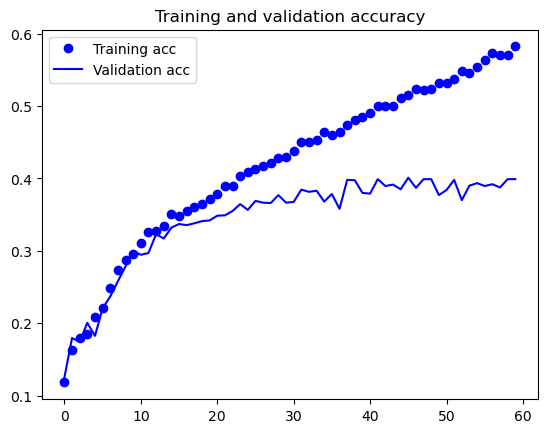

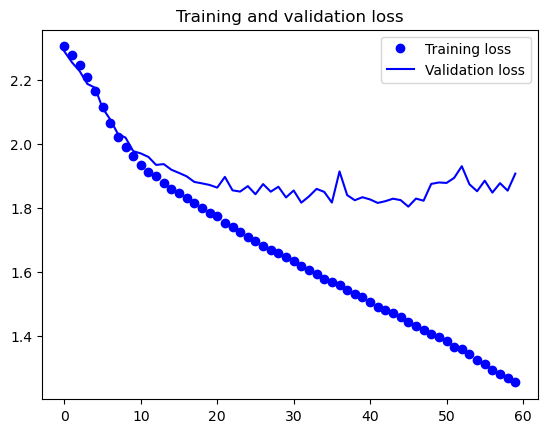

In [135]:
acc = history13.history['acc']
val_acc = history13.history['val_acc']
loss = history13.history['loss']
val_loss = history13.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [137]:
model_13.save('model_13.h5')

### Model #14 <a id="model_14"></a>

[Back to Model Evaluation](#model_14me)

Dropout = 0.2 after pooling 

In [145]:
model_14 = models.Sequential()
model_14.add(layers.Conv2D(32, kernel_size = (3, 3), kernel_regularizer=regularizers.l2(0.0001),
                          activation='relu', input_shape=(100, 100, 3)))
model_14.add(layers.MaxPooling2D(pool_size = (2, 2)))
model_14.add(layers.Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model_14.add(layers.MaxPooling2D((2, 2))))
model_14.add(layers.Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model_14.add(layers.MaxPooling2D((2, 2)))

model_14.add(layers.Flatten())
model_14.add(layers.Dense(20, activation='relu'))
model_14.add(layers.Dense(20, activation='relu'))
model_14.add(layers.Dense(10, activation='softmax'))

model_14.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_55 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 21, 21, 64)        36928     
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 10, 10, 64)     

In [146]:
model_14.compile(optimizer=optimizers.RMSprop(learning_rate=.0001),
              loss='categorical_crossentropy',
              metrics=['acc'])

history14 = model_14.fit(train_generator, steps_per_epoch = 300, epochs=20, 
        validation_data=validation_generator, validation_steps=80)

Epoch 1/30
300/300 [==============================] - 108s 356ms/step - loss: 2.2882 - acc: 0.1276 - val_loss: 2.2449 - val_acc: 0.1790
Epoch 2/30
300/300 [==============================] - 108s 361ms/step - loss: 2.2028 - acc: 0.1963 - val_loss: 2.1782 - val_acc: 0.2075
Epoch 3/30
300/300 [==============================] - 107s 355ms/step - loss: 2.1115 - acc: 0.2389 - val_loss: 2.0976 - val_acc: 0.2625
Epoch 4/30
300/300 [==============================] - 108s 359ms/step - loss: 2.0319 - acc: 0.2828 - val_loss: 2.0168 - val_acc: 0.2905
Epoch 5/30
300/300 [==============================] - 109s 362ms/step - loss: 1.9689 - acc: 0.3069 - val_loss: 1.9995 - val_acc: 0.2905
Epoch 6/30
300/300 [==============================] - 112s 372ms/step - loss: 1.9265 - acc: 0.3271 - val_loss: 2.0134 - val_acc: 0.2785
Epoch 7/30
300/300 [==============================] - 146s 487ms/step - loss: 1.8954 - acc: 0.3404 - val_loss: 1.9442 - val_acc: 0.3250
Epoch 8/30
300/300 [============================

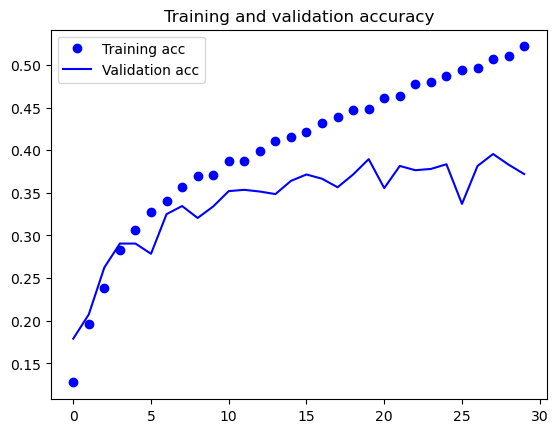

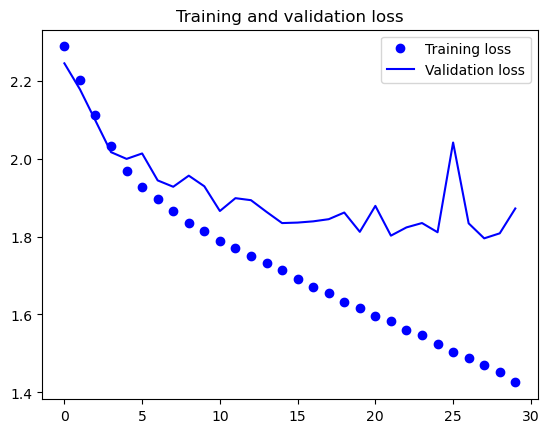

In [147]:
acc = history14.history['acc']
val_acc = history14.history['val_acc']
loss = history14.history['loss']
val_loss = history14.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [148]:
test_generator =test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size,img_size),
        batch_size = 25,
        class_mode = 'categorical')
test_loss, test_acc = model_14.evaluate(test_generator, steps=20)
print('test acc:', test_acc) 

Found 500 images belonging to 10 classes.
20/20 [==============================] - 3s 172ms/step - loss: 1.9617 - acc: 0.3660
test acc: 0.3659999966621399


In [ ]:
model_14.save('model_14.h5')

## Step 3 – Evaluate the Developed Models using Testing Images

#### Model using conv2d & dense layers

[To model](#baseline_1) <a id="baseline_1me"></a>

In [101]:
# Baseline #1
baseline_1 = keras.models.load_model('baseline_1.h5')

test_generator =test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size,img_size),
        batch_size = 25,
        class_mode = 'categorical')
test_loss, test_acc = baseline_1.evaluate(test_generator, steps=20)
print('test acc:', test_acc) 


Found 500 images belonging to 10 classes.
20/20 [==============================] - 6s 284ms/step - loss: 1.9695 - acc: 0.3860
test acc: 0.38600000739097595


[To model](#model_1) <a id="model_1me"></a>

In [102]:
# model 1
model_1 = keras.models.load_model('model_1.h5')

test_generator =test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size,img_size),
        batch_size = 25,
        class_mode = 'categorical')
test_loss, test_acc = model_1.evaluate(test_generator, steps=20)
print('test acc:', test_acc) 

Found 500 images belonging to 10 classes.
20/20 [==============================] - 5s 223ms/step - loss: 6.3562 - acc: 0.3680
test acc: 0.36800000071525574


[To model](#model_2) <a id="model_2me"></a>

In [103]:
# model 2
model_2 = keras.models.load_model('model_2.h5')

test_generator =test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size,img_size),
        batch_size = 25,
        class_mode = 'categorical')
test_loss, test_acc = model_2.evaluate(test_generator, steps=20)
print('test acc:', test_acc) 

Found 500 images belonging to 10 classes.
20/20 [==============================] - 4s 185ms/step - loss: 2.3684 - acc: 0.2160
test acc: 0.2160000056028366


[To model](#model_3) <a id="model_3me"></a>

In [104]:
# model 3
model_3 = keras.models.load_model('model_3.h5')

test_generator =test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size,img_size),
        batch_size = 25,
        class_mode = 'categorical')
test_loss, test_acc = model_3.evaluate(test_generator, steps=20)
print('test acc:', test_acc) 

Found 500 images belonging to 10 classes.
20/20 [==============================] - 4s 182ms/step - loss: 2.0345 - acc: 0.3500
test acc: 0.3499999940395355


[To model](#model_4) <a id="model_4me"></a>

In [105]:
# model 4 
model_4 = keras.models.load_model('model_4.h5')

test_generator =test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size,img_size),
        batch_size = 25,
        class_mode = 'categorical')
test_loss, test_acc = model_4.evaluate(test_generator, steps=20)
print('test acc:', test_acc) 

Found 500 images belonging to 10 classes.
20/20 [==============================] - 4s 193ms/step - loss: 1.8686 - acc: 0.3700
test acc: 0.3700000047683716


[To model](#model_5) <a id="model_5me"></a>

In [106]:
# model 5 
model_5 = keras.models.load_model('model_5.h5')

test_generator =test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size,img_size),
        batch_size = 25,
        class_mode = 'categorical')
test_loss, test_acc = model_5.evaluate(test_generator, steps=20)
print('test acc:', test_acc) 

Found 500 images belonging to 10 classes.
20/20 [==============================] - 4s 193ms/step - loss: 1.9725 - acc: 0.3920
test acc: 0.3919999897480011


[To model](#model_6) <a id="model_6me"></a>

In [107]:
# model 6 
model_6 = keras.models.load_model('model_6.h5')

test_generator =test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size,img_size),
        batch_size = 25,
        class_mode = 'categorical')
test_loss, test_acc = model_6.evaluate(test_generator, steps=20)
print('test acc:', test_acc) 

Found 500 images belonging to 10 classes.
20/20 [==============================] - 4s 193ms/step - loss: 2.0102 - acc: 0.3680
test acc: 0.36800000071525574


[To model](#model_7) <a id="model_7me"></a>

In [108]:
#model 7
model_7 = keras.models.load_model('model_7.h5')

test_generator =test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size,img_size),
        batch_size =25,
        class_mode = 'categorical')
test_loss, test_acc = model_7.evaluate(test_generator, steps=20)
print('test acc:', test_acc) 

Found 500 images belonging to 10 classes.
20/20 [==============================] - 4s 192ms/step - loss: 2.0581 - acc: 0.3340
test acc: 0.33399999141693115


[To model](#model_8) <a id="model_8me"></a>

In [122]:
#model 8
model_8 = keras.models.load_model('model_8.h5')

test_generator =test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size,img_size),
        batch_size = 25,
        class_mode = 'categorical')
test_loss, test_acc = model_8.evaluate(test_generator, steps=20)
print('test acc:', test_acc) 

Found 500 images belonging to 10 classes.
20/20 [==============================] - 3s 146ms/step - loss: 2.1257 - acc: 0.3520
test acc: 0.35199999809265137


[To model](#model_9) <a id="model_9me"></a>

In [123]:
#model 9 
model_9 = keras.models.load_model('model_9.h5')

test_generator =test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size,img_size),
        batch_size = 25,
        class_mode = 'categorical')
test_loss, test_acc = model_9.evaluate(test_generator, steps=20)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
20/20 [==============================] - 3s 153ms/step - loss: 2.2565 - acc: 0.1940
test acc: 0.1940000057220459


[To model](#model_10) <a id="model_10me"></a>

In [129]:
#model 10 
model_10 = keras.models.load_model('model_10.h5')

test_generator =test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size,img_size),
        batch_size = 25,
        class_mode = 'categorical')
test_loss, test_acc = model_10.evaluate(test_generator, steps=20)
print('test acc:', test_acc) 

Found 500 images belonging to 10 classes.
20/20 [==============================] - 4s 166ms/step - loss: 2.0646 - acc: 0.3660
test acc: 0.3659999966621399


[To model](#model_11) <a id="model_11me"></a>

In [130]:
#model 11
model_11 = keras.models.load_model('model_11.h5')

test_generator =test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size,img_size),
        batch_size = 25,
        class_mode = 'categorical')
test_loss, test_acc = model_11.evaluate(test_generator, steps=20)
print('test acc:', test_acc) 

Found 500 images belonging to 10 classes.
20/20 [==============================] - 4s 188ms/step - loss: 2.3107 - acc: 0.1180
test acc: 0.11800000071525574


[To model](#model_12) <a id="model_12me"></a>

In [ ]:
#model 12
model_12 = keras.models.load_model('model_12.h5')

test_generator =test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size,img_size),
        batch_size = 25,
        class_mode = 'categorical')
test_loss, test_acc = model_12.evaluate(test_generator, steps=20)
print('test acc:', test_acc) 

In [ ]:
# wasnt able to load out test accuracy for this again since thrs an issue with this notebook but i did save the accuracy 
# beforehand on a document 

test acc: 0.3799999952316284

[To model](#model_13) <a id="model13_me"></a>

In [ ]:
#model 13
model_13 = keras.models.load_model('model_13.h5')

test_generator =test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size,img_size),
        batch_size = 25,
        class_mode = 'categorical')
test_loss, test_acc = model_13.evaluate(test_generator, steps=20)
print('test acc:', test_acc) 

In [ ]:
# wasnt able to load out test accuracy for this again since thrs an issue with this notebook but i did save the accuracy 
# beforehand on a document 

test acc: 0.3799999952316284